In [72]:
# 导入所需的模块
import time
import urllib
import urllib.request
import requests
import numpy as np
from bs4 import BeautifulSoup
from openpyxl import Workbook
import sys
import importlib
import imp
from urllib import request, parse


importlib.reload(sys)

# 定义一些User-Agent，用于模拟浏览器发送请求
hds=[{'User-Agent':
'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36 Edg/114.0.1823.58'}]



In [73]:
import time
from urllib import request
from bs4 import BeautifulSoup
import pandas as pd

# 用户输入查询的标签和页面数量
tag = input("请输入豆瓣书籍的标签（如茶道）：")
tag_encoded = request.quote(tag)  # URL编码
tag = request.quote(tag)  # URL编码
num_pages = int(input("请输入要抓取的页面数量（每页15本书）："))

base_url = f"https://www.douban.com/tag/{tag}/book?start="

# 创建一个空的 DataFrame 来保存数据
df = pd.DataFrame(columns=["Title", "Author", "Publisher", "Publish Date", "Price", "Rating"])

# 抓取用户指定的页面数量
for page_num in range(num_pages):
    # 计算start的值
    start_num = page_num * 15
    url = base_url + str(start_num)  # 拼接url

    req = request.Request(url, headers=hds[page_num%len(hds)])  # 发起请求
    response = request.urlopen(req)  # 获取响应
    source_code = response.read()  # 读取响应内容
    plain_text = source_code.decode('utf-8')  # 解码字符串

    # 使用BeautifulSoup解析HTML内容
    soup = BeautifulSoup(plain_text, 'html.parser')

    # 提取每本书的dl元素
    book_elements = soup.find_all('dl')

    for book in book_elements:
        # 提取书籍标题
        title_element = book.find('a', class_='title')
        if title_element is not None:
            title = title_element.string.strip()
        else:
            print("Could not find title for a book")
            continue  # skip to the next book

        # 提取作者、出版社和出版日期等信息
        details = book.find('div', class_='desc').text.strip().split('/')
        
        try:
            if len(details) == 4:
                author = details[0].strip()
                publisher = details[1].strip()
                publish_date = details[2].strip()
            elif len(details) == 5:
                author = details[0].strip() + '/' + details[1].strip()
                publisher = details[2].strip()
                publish_date = details[3].strip()
            elif len(details) == 6:
                author = details[0].strip() + '/' + details[1].strip() + '/' + details[2].strip()
                publisher = details[3].strip()
                publish_date = details[4].strip()
            elif len(details) >= 7:
                author = '/'.join(details[:5]).strip()
                publisher = details[-3].strip()
                publish_date = details[-2].strip()
            else:
                print("Unexpected number of tags in book details for book titled:", title)
                continue  # skip to the next book
        except IndexError:
            print("Could not parse book details for book titled:", title)
            continue  # skip to the next book

        # 提取价格
        price = details[-1].strip()

        # 提取评分
        rating_element = book.find('span', class_='rating_nums')
        if rating_element is not None:
            rating = rating_element.string.strip()
        else:
            print("Could not find rating for book titled:", title)
            continue  # skip to the next book

        # 将信息添加到 DataFrame 中
        df = df.append({"Title": title, 
                        "Author": author, 
                        "Publisher": publisher, 
                        "Publish Date": publish_date, 
                        "Price": price, 
                        "Rating": rating}, ignore_index=True)

    # 控制访问速度，休眠2秒再访问下一页面，可以根据实际情况调整
    time.sleep(2)

# 解码标签并用于文件名
tag_decoded = request.unquote(tag_encoded)
filename = f"./小组作业数据/douban_books_{tag_decoded}.xlsx"
df.to_excel(filename, index=False)


请输入豆瓣书籍的标签（如茶道）：生物
请输入要抓取的页面数量（每页15本书）：3
Could not find rating for book titled: 能量，性，自杀


In [74]:
import pandas as pd
import re

# 解码标签并用于文件名
tag_decoded = request.unquote(tag_encoded)
filename = f"./小组作业数据/douban_books_{tag_decoded}.xlsx"
df.to_excel(filename, index=False)
df

,Title,Author,Publisher,Publish Date,Price,Rating
0,基因彩票,(美) 凯瑟琳·佩奇·哈登/陆大鹏,辽宁人民出版社,2023-3,98.00元,8.1
1,复杂生命的起源,[英] 尼克·莱恩（Nick Lane）/严曦,后浪丨贵州大学出版社,2020-11,84.00元,9.2
2,隐蔽的宇宙,[巴西] 亚历山大·安东内利/喻柏雅,人民邮电出版社,2023-5,68.00,9.4
3,屠海,法利·莫厄特/高见/刘莹,广西师范大学出版社,2023-4,98,9.1
4,它们的性,王大可,新星出版社,2022-7,59.00元,8.2
5,怎样观察一棵树,[美] 南茜·罗斯·胡格（Nancy Ross Hugo）/[美] 罗伯特·卢埃林（Robe...,商务印书馆,2016-9,88.00元,9.0
6,认知神经科学,Michael S. Gazzaniga / Richard B. Ivry / Georg...,中国轻工业出版社,2011-2,180.00元,9.2
7,人体简史,[英] 比尔·布莱森/闾佳,文汇出版社,2020-6-1,69.9,8.6
8,第三种黑猩猩,（美）贾雷德·戴蒙德/王道还,上海译文出版社,2012-5,38.00元,8.7
9,癌症·真相,菠萝/李治中,清华大学出版社,2015-9-1,39.00元,8.8


In [75]:
import pandas as pd
import re

# 定义历史汇率
currency_conversion = {
    'USD': 6.5,
    'CAD': 5,
    'GBP': 8.6,
    'NTD': 0.22,
    'NT$': 0.22,
    '元': 1,
    'CNY': 1,
    'TWD': 0.22
}

# 提取数字和货币符号
df['Price'] = df['Price'].apply(lambda x: re.findall(r"([A-Z]*\s*\d+[\.,]?\d*[A-Z]*)", str(x)))

# 提取第一个匹配的数字和货币，如果没有匹配的数字则返回NaN
df['Price'] = df['Price'].apply(lambda x: x[0] if x else float('nan'))

# 删除价格为空的行
df = df.dropna(subset=['Price'])

# 将价格按货币类型转换为人民币
def convert_to_cny(price_string):
    for currency in currency_conversion.keys():
        if currency in price_string:
            number = re.findall(r"(\d+[\.,]?\d*)", price_string)[0]
            return float(number.replace(',', '.')) * currency_conversion[currency]
    # 如果没有找到货币单位，则假设价格是以人民币表示的
    number = re.findall(r"(\d+[\.,]?\d*)", price_string)
    if number:
        return float(number[0].replace(',', '.'))
    return float('nan')

df['Price'] = df['Price'].apply(convert_to_cny)

# 如果价格大于1000，则删除该行
df = df[df['Price'] <= 1000]

# 输出清洗后的数据
print(df)

# 创建文件夹
folder_name = f"./小组作业数据/{tag_decoded}"
os.makedirs(folder_name, exist_ok=True)

# 生成文件路径和文件名
filename = f"douban_books_{tag_decoded}_改.xlsx"
file_path = os.path.join(folder_name, filename)

# 保存清洗后的数据到Excel文件
df.to_excel(file_path, index=False)

print("数据已保存到文件:", file_path)


                 Title                                             Author  \
0                 基因彩票                                  (美) 凯瑟琳·佩奇·哈登/陆大鹏   
1              复杂生命的起源                            [英] 尼克·莱恩（Nick Lane）/严曦   
2                隐蔽的宇宙                                 [巴西] 亚历山大·安东内利/喻柏雅   
3                   屠海                                       法利·莫厄特/高见/刘莹   
4                 它们的性                                                王大可   
5              怎样观察一棵树  [美] 南茜·罗斯·胡格（Nancy Ross Hugo）/[美] 罗伯特·卢埃林（Robe...   
6               认知神经科学  Michael S. Gazzaniga / Richard B. Ivry / Georg...   
7                 人体简史                                      [英] 比尔·布莱森/闾佳   
8               第三种黑猩猩                                     （美）贾雷德·戴蒙德/王道还   
9                癌症·真相                                             菠萝/李治中   
10             我们为什么生病    [美] R.M.尼斯 / [美] G.C.威廉斯 / 易凡 / 禹宽平 / 湖南科学技术出版社   
11            王立铭进化论讲义                                            王立铭/王立铭   

In [62]:
tag_decoded
# 生成文件路径和文件名
folder_name = f"./小组作业数据/{tag_decoded}"
filename = f"douban_books_{tag_decoded}_改.xlsx"
file_path = os.path.join(folder_name, filename)

# 读取Excel文件
df = pd.read_excel(file_path)

df

,Title,Author,Publisher,Publish Date,Price,Rating
0,基因彩票,(美) 凯瑟琳·佩奇·哈登/陆大鹏,辽宁人民出版社,2023-3,98.0,8.1
1,复杂生命的起源,[英] 尼克·莱恩（Nick Lane）/严曦,后浪丨贵州大学出版社,2020-11,84.0,9.2
2,隐蔽的宇宙,[巴西] 亚历山大·安东内利/喻柏雅,人民邮电出版社,2023-5,68.0,9.4
3,屠海,法利·莫厄特/高见/刘莹,广西师范大学出版社,2023-4,98.0,9.1
4,它们的性,王大可,新星出版社,2022-7,59.0,8.2
5,怎样观察一棵树,[美] 南茜·罗斯·胡格（Nancy Ross Hugo）/[美] 罗伯特·卢埃林（Robe...,商务印书馆,2016-9,88.0,9.0
6,认知神经科学,Michael S. Gazzaniga / Richard B. Ivry / Georg...,中国轻工业出版社,2011-2,180.0,9.2
7,人体简史,[英] 比尔·布莱森/闾佳,文汇出版社,2020-6-1,69.9,8.6
8,第三种黑猩猩,（美）贾雷德·戴蒙德/王道还,上海译文出版社,2012-5,38.0,8.7
9,癌症·真相,菠萝/李治中,清华大学出版社,2015-9-1,39.0,8.8


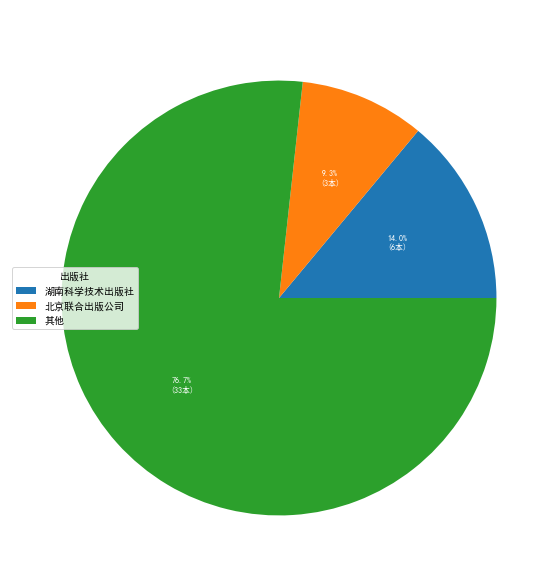

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

# 使用支持中文的字体（这里假设你已经安装了宋体）
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置阈值
threshold = 4

# 生成文件路径和文件名
folder_name = f"./小组作业数据/{tag_decoded}"
filename = f"douban_books_{tag_decoded}_改.xlsx"
file_path = os.path.join(folder_name, filename)

# 读取Excel文件
df = pd.read_excel(file_path)

# 计算每个出版社的图书数量
publisher_counts = df['Publisher'].value_counts()

# 过滤出数量大于等于阈值的出版社数据
filtered_publishers = publisher_counts[publisher_counts >= threshold]

# 获取过滤后的出版社名称和对应的图书数量
publisher_names = filtered_publishers.index
book_counts = filtered_publishers.values

# 计算剩余出版社的总图书数量
remaining_books_count = publisher_counts[publisher_counts < threshold].sum()

# 将剩余出版社归类为"其他"
publisher_names = list(publisher_names) + ["其他"]
book_counts = list(book_counts) + [remaining_books_count]

# 添加饼图上的具体数量
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d}本)".format(pct, absolute)

# 创建饼图
fig, ax = plt.subplots(figsize=(10, 10))  # 设置图形大小
wedges, texts, autotexts = ax.pie(book_counts, autopct=lambda pct: func(pct, book_counts), textprops=dict(color="w"))

# 添加标题
title = plt.title('出版社书籍数量')
title.set_color('white')
title.set_weight('bold')
title.set_size(16)

# 添加图例
ax.legend(wedges, publisher_names,
          title="出版社",
          loc="center left",
          bbox_to_anchor=(0, 0, 0.5, 1))

# 设置图例标签为中文
for text in texts:
    text.set_fontproperties(rcParams['font.sans-serif'][0])

plt.setp(autotexts, size=8, weight="bold")

# 生成图片文件名
output_filename = os.path.splitext(file_path)[0] + "_饼图.png"
plt.savefig(output_filename)


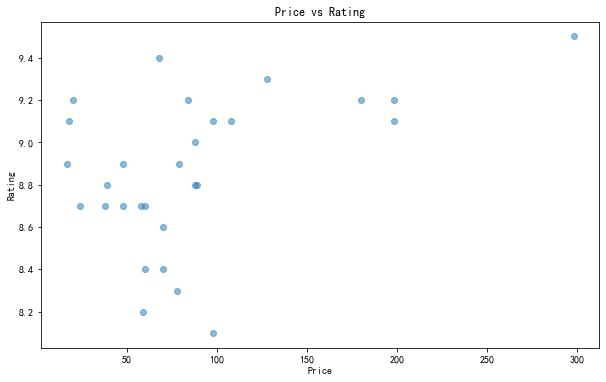

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 生成文件路径和文件名
folder_name = f"./小组作业数据/{tag_decoded}"
filename = f"douban_books_{tag_decoded}_改.xlsx"
file_path = os.path.join(folder_name, filename)

# 读取Excel文件
df = pd.read_excel(file_path)


# 使用散点图展示价格与评分之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Rating'], alpha=0.5)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


In [77]:
# 获取价格和评分的统计量
stats_price_rating = df[['Price', 'Rating']].describe()

print(stats_price_rating)




            Price     Rating
count   43.000000  43.000000
mean    80.481395   8.776744
std     54.093263   0.459211
min     16.500000   7.600000
25%     48.000000   8.400000
50%     69.900000   8.800000
75%     88.500000   9.150000
max    298.000000   9.600000


In [66]:
from dateutil.parser import parse

# 定义一个函数，尝试将字符串转换为日期
def try_parse_date(date_str):
    try:
        # 尝试解析日期
        # dateutil.parser.parse 可以处理多种格式
        return parse(date_str, yearfirst=True, dayfirst=False)
    except Exception:
        # 如果解析失败，返回np.nan
        return np.nan

# 使用apply函数应用转换函数
df['Publish Date'] = df['Publish Date'].apply(try_parse_date)

# 删除无法转换为日期的行
df = df.dropna(subset=['Publish Date'])

# 现在你可以将其转换为datetime对象了
df['Publish Date'] = pd.to_datetime(df['Publish Date'])

# 获取统计量
stats_publish_date = df['Publish Date'].describe()
print(stats_publish_date)


count                      29
unique                     29
top       2023-03-04 00:00:00
freq                        1
first     1998-01-04 00:00:00
last      2023-05-04 00:00:00
Name: Publish Date, dtype: object


C:\Users\lenovo\AppData\Local\Temp/ipykernel_32032/4044930241.py:23: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  stats_publish_date = df['Publish Date'].describe()


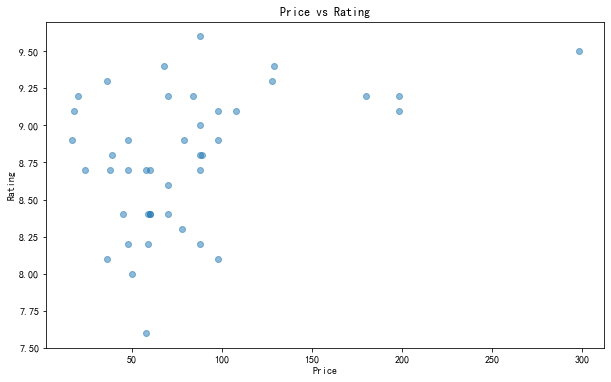

C:\Users\lenovo\AppData\Local\Temp/ipykernel_32032/3570544430.py:57: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  stats_publish_date = df['Publish Date'].describe()


In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse

# 生成文件路径和文件名
folder_name = f"./小组作业数据/{tag_decoded}"
filename = f"douban_books_{tag_decoded}_改.xlsx"
file_path = os.path.join(folder_name, filename)

# 读取Excel文件
df = pd.read_excel(file_path)


# 定义一个函数，尝试将字符串转换为日期
def try_parse_date(date_str):
    try:
        # 尝试解析日期
        return parse(date_str, yearfirst=True, dayfirst=False)
    except Exception:
        # 如果解析失败，返回np.nan
        return np.nan

# 使用apply函数应用转换函数
df['Publish Date'] = df['Publish Date'].apply(try_parse_date)

# 删除无法转换为日期的行
df = df.dropna(subset=['Publish Date'])

# 现在你可以将其转换为datetime对象了
df['Publish Date'] = pd.to_datetime(df['Publish Date'])

# 获取文件基本名
base_name = os.path.splitext(os.path.basename(file_path))[0]

# 定义保存的目录
save_dir = f"./小组作业数据/{tag_decoded}"

# 使用散点图展示价格与评分之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Rating'], alpha=0.5)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')

# 保存图片，保存在指定的目录下，名称与原始文件一致
output_filename = os.path.join(save_dir, f"douban_books_{tag_decoded}_改_Price_vs_Rating.png")
plt.savefig(output_filename)
plt.show()


# 获取价格和评分的统计量
stats_price_rating = df[['Price', 'Rating']].describe()

# 获取日期的统计量
stats_publish_date = df['Publish Date'].describe()

# 将统计数据保存到txt文件，保存在指定的目录下，名称与原始文件一致
with open(os.path.join(save_dir, base_name + '_stats.txt'), 'w') as f:
    f.write("Price and Rating stats:\n")
    f.write(stats_price_rating.to_string())
    f.write("\n\nPublish Date stats:\n")
    f.write(stats_publish_date.to_string())


In [79]:
tag_decoded

'生物'

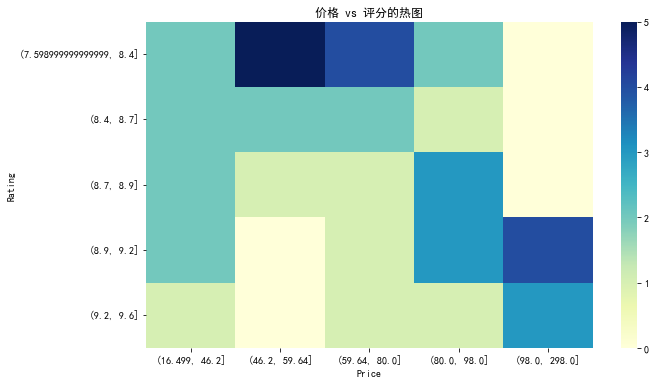

热图已保存至：./小组作业数据/生物\douban_books_生物_改_heatmap.png


In [80]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 生成文件夹路径和文件名
folder_name = f"./小组作业数据/{tag_decoded}"
filename = f"douban_books_{tag_decoded}_改.xlsx"
file_path = os.path.join(folder_name, filename)

# 读取Excel文件
df = pd.read_excel(file_path)

# 确保 'Price' 和 'Rating' 列的数据都是数值类型
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# 删除包含 NaN 的行
df = df.dropna(subset=['Price', 'Rating'])

# 将价格和评分转化为离散值
df['Rating'] = pd.qcut(df['Rating'], 5)
df['Price'] = pd.qcut(df['Price'], 5)

# 计算每个价格和评分组合的数量
heatmap_data = df.groupby(['Rating', 'Price']).size().unstack()

# 创建热图
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('价格 vs 评分的热图')

# 生成文件夹路径和文件名
folder_name = f"./小组作业数据/{tag_decoded}"
filename = f"douban_books_{tag_decoded}_改.xlsx"
file_name = os.path.splitext(filename)[0]  # 去除扩展名的文件名
file_path = os.path.join(folder_name, filename)

# 生成图片保存的路径和文件名
heatmap_filename = f"{file_name}_heatmap.png"
heatmap_filepath = os.path.join(folder_name, heatmap_filename)

# 保存图片
plt.savefig(heatmap_filepath)
plt.show()

# 打印保存的文件路径
print(f"热图已保存至：{heatmap_filepath}")


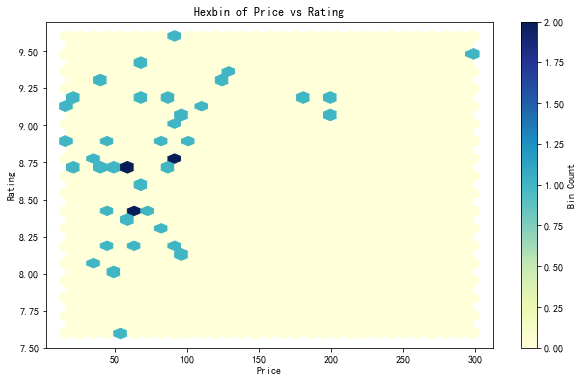

In [81]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 生成文件路径和文件名
folder_name = f"./小组作业数据/{tag_decoded}"
filename = f"douban_books_{tag_decoded}_改.xlsx"
file_path = os.path.join(folder_name, filename)

# 读取Excel文件
df = pd.read_excel(file_path)

# 确保 'Price' 和 'Rating' 列的数据都是数值类型
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# 删除包含 NaN 的行
df = df.dropna(subset=['Price', 'Rating'])

# 创建 Hexbin 图
plt.figure(figsize=(10, 6))
plt.hexbin(df['Price'], df['Rating'], gridsize=30, cmap='YlGnBu')
plt.colorbar(label='Bin Count')
plt.title('Hexbin of Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')

# 生成文件夹路径和文件名
folder_name = f"./小组作业数据/{tag_decoded}"
filename = f"douban_books_{tag_decoded}_改.xlsx"
file_name = os.path.splitext(filename)[0]  # 去除扩展名的文件名
file_path = os.path.join(folder_name, filename)

# 保存图片到指定目录，文件名和源文件名一致
plt.savefig(os.path.join(folder_name, file_name + '_hexbin.png'))
plt.show()
